# imports


In [1]:
import numpy as np
import pandas as pd
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
column_headings=["user_id",  "item_id", "rating" ,"timestamp"]
intial_document=pd.read_csv('ml-100k/u.data',sep='\t',names=column_headings)

In [4]:
intial_document.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
intial_document.shape

(100000, 4)

In [6]:
intial_document['user_id'].nunique()

943

In [7]:
intial_document['item_id'].nunique()

1682

In [8]:
movies_names=pd.read_csv("ml-100k/u.item",sep="\|",encoding="ANSI",header=None)

In [9]:
movies_names.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movies_names.shape

(1682, 24)

In [11]:
movies_names=movies_names[[0,1]]
movies_names

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [12]:
movies_names.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
movies_names.tail()
movies_names.columns=['item_id','titles']

In [14]:
movies_names

,item_id,titles
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [15]:
merged_doc=pd.merge(intial_document,movies_names, on='item_id')

In [16]:
merged_doc.tail()

,user_id,item_id,rating,timestamp,titles
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [18]:
## i am caluculating the average rating of the movie so first i will group by title and find out which one got high ratings

In [19]:
merged_doc.groupby('titles').mean()['rating'].sort_values(ascending=False)

titles
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [20]:
##i m now wondering how 5 out of 5 for a bad movie also because it was rated by only one user who liked it and upon meaning we will be  getting 5 only

In [21]:
merged_doc.groupby('titles').count()["rating"]

titles
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [22]:
#if i want to make it in a dataframe so i will use a table representation

In [23]:
ratings=pd.DataFrame(merged_doc.groupby('titles').mean()['rating'])

In [24]:
ratings

,rating
titles,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [25]:
ratings['num of people rated']=pd.DataFrame(merged_doc.groupby('titles').count()["rating"])

In [26]:
ratings

,rating,num of people rated
titles,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [27]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of people rated
titles,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


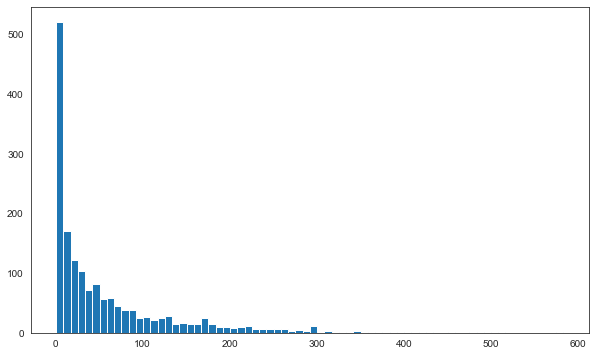

In [28]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of people rated'], bins = 70)
plt.show()

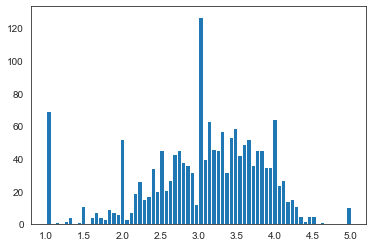

In [29]:
plt.hist(ratings['rating'],bins= 70 )
plt.show()

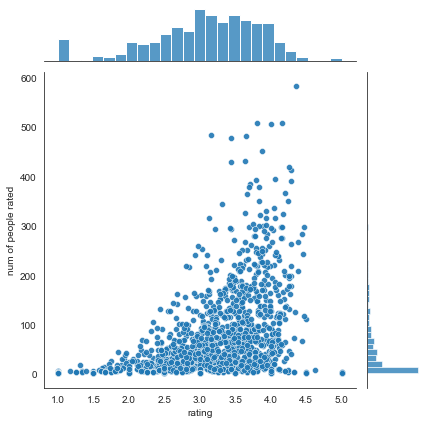

In [30]:
sns.jointplot(x='rating', y='num of people rated' ,data=ratings ,alpha=0.9)

In [31]:
merged_doc.head()

,user_id,item_id,rating,timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [32]:
matrix=merged_doc.pivot_table(index='user_id', columns='titles',values="rating")
matrix.head()

titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [33]:
ratings.sort_values(by='num of people rated',ascending=False).head()

,rating,num of people rated
titles,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [34]:
starwar_ratings=matrix["Contact (1997)"]

In [35]:
starwar_ratings.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [36]:
similar_to_star_wars=matrix.corrwith(starwar_ratings)

In [37]:
pd.DataFrame(similar_to_star_wars)

,0
titles,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
...,...
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864
Zeus and Roxanne (1997),-0.866025


In [38]:
corr_starwars=pd.DataFrame(similar_to_star_wars,columns=["correlation"])

In [39]:
corr_starwars

,correlation
titles,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
...,...
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864
Zeus and Roxanne (1997),-0.866025


In [40]:
corr_starwars.dropna(inplace=True)

In [41]:
corr_starwars

,correlation
titles,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [42]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
titles,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
Faust (1994),1.0
Fausto (1993),1.0


In [43]:
corr_starwars

,correlation
titles,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [44]:
corr_starwars=corr_starwars.join(ratings['num of people rated'])
corr_starwars.head()

,correlation,num of people rated
titles,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [45]:
corr_starwars[corr_starwars['num of people rated']>100].sort_values('correlation',ascending=False)

,correlation,num of people rated
titles,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
...,...,...
Snow White and the Seven Dwarfs (1937),-0.182526,172
"Ice Storm, The (1997)",-0.186964,108
Some Like It Hot (1959),-0.204401,128


In [46]:
def predict_movies(movie_name):
    movie_user_ratings=matrix[movie_name]
    similar_to_movie=matrix.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=["correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings["num of people rated"])
    prediction=corr_movie[corr_movie['num of people rated']>100].sort_values('correlation',ascending=False)
    return prediction

In [47]:
prediction=predict_movies("Forrest Gump (1994)")

In [48]:
prediction

,correlation,num of people rated
titles,,
Forrest Gump (1994),1.000000,321
Field of Dreams (1989),0.486450,212
"Firm, The (1993)",0.464948,151
"River Wild, The (1994)",0.448505,146
Young Guns (1988),0.437801,101
...,...,...
Citizen Kane (1941),-0.147939,198
Boogie Nights (1997),-0.155039,189
Secrets & Lies (1996),-0.178224,162
